# Demo-1: Spectral Selectivity from selective RF Pulse.


## 0. Preparation


In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from pprint import pprint
from copy import deepcopy

import SpSpSelectivity

## 1. Square Pulse

We start from an easy example


### Trajectory of Magnetization Vector


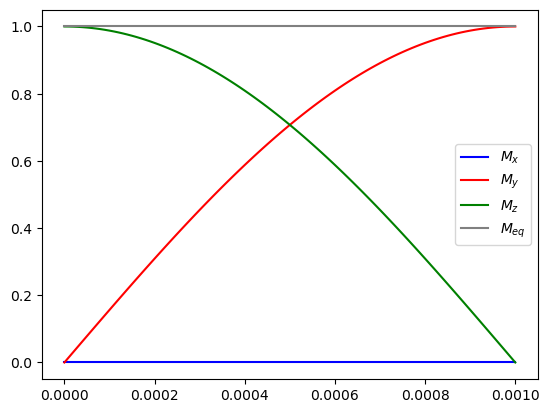

In [2]:
T_1 = 1             # sec
R_1 = 0  # 1 / T_1       # s^-1
T_2 = 0.05          # sec
R_2 = 0  # 1 / T_2       # s^-1
deltaOmegaZ = 0     # rad
omega1Y = 0         # rad
omega1X = 250 * 2 * np.pi       # rad
nSteps = int(1e2)
tau = 1e-3             # sec
dTau = tau/nSteps    # sec
dTauList = np.linspace(start=0, stop=tau, num=nSteps+1, endpoint=True)

# A = np.array([[-R_2, deltaOmegaZ, -omega1Y, 0],[-deltaOmegaZ, -R_2,omega1X,0],[omega1Y, -omega1X, R_1, R_1],[0,0,0,0]])

A = SpSpSelectivity.constructBlochMatrix(
    deltaOmegaZ=deltaOmegaZ, omega1X=omega1X, omega1Y=omega1Y, R_1=R_1, R_2=R_2)

M_0T = np.array([[0, 0, 1, 1]])
M_0 = M_0T.T

mTrajList = SpSpSelectivity.solveAnalyticalBlochTraj(A, M_0, nSteps, dTau)


plt.figure()
plt.plot(dTauList, mTrajList[:, 0], color='blue', label='$M_x$')
plt.plot(dTauList, mTrajList[:, 1], color='red', label='$M_y$')
plt.plot(dTauList, mTrajList[:, 2], color='green', label='$M_z$')
plt.plot(dTauList, mTrajList[:, 3], color='grey', label='$M_{eq}$')

plt.legend(loc='best')
plt.show()

overallPropagator = SpSpSelectivity.solveAnalyticalBlochStepPropagator(A, tau)
finalState = np.dot(overallPropagator, M_0)

In [3]:
pprint(mTrajList[-1])

pprint(finalState)


array([[ 0.00000000e+00],
       [ 1.00000000e+00],
       [-5.58580959e-16],
       [ 1.00000000e+00]])
array([[0.],
       [1.],
       [0.],
       [1.]])


### Frequence responce of RF pulse with offset

Then we launch a sweep of RF offset frequency


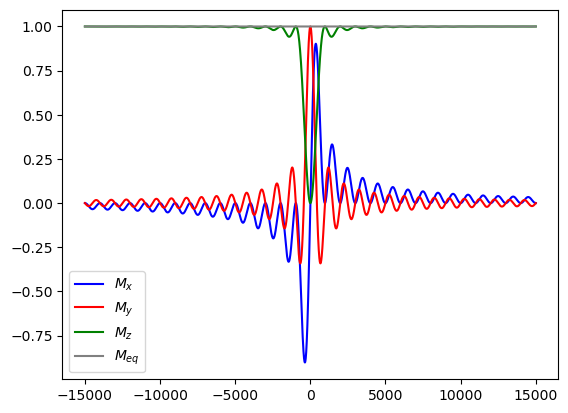

In [4]:
deltaOmegaZRange = np.linspace(
    start=-15000, stop=15000, num=5001, endpoint=True)

offsetSweepTraj = []

for freqOffset in deltaOmegaZRange:
    A = SpSpSelectivity.constructBlochMatrix(
        deltaOmegaZ=freqOffset*2*np.pi, omega1X=omega1X, omega1Y=omega1Y, R_1=R_1, R_2=R_2)
    overallPropagator = SpSpSelectivity.solveAnalyticalBlochStepPropagator(
        A, tau)
    offsetSweepTraj.append(np.dot(overallPropagator, M_0))
offsetSweepTraj = np.asarray(offsetSweepTraj)

plt.figure()
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 0], color='blue', label='$M_x$')
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 1], color='red', label='$M_y$')
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 2], color='green', label='$M_z$')
plt.plot(deltaOmegaZRange,
         offsetSweepTraj[:, 3], color='grey', label='$M_{eq}$')

plt.legend(loc='best')
plt.show()

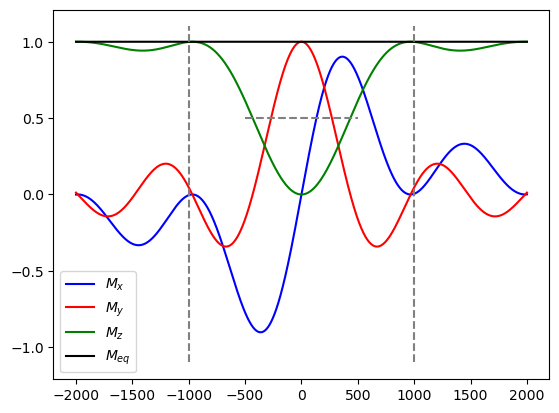

In [5]:
deltaOmegaZRange = np.linspace(start=-2000, stop=2000, num=5001, endpoint=True)

offsetSweepTraj = []

for freqOffset in deltaOmegaZRange:
    A = SpSpSelectivity.constructBlochMatrix(
        deltaOmegaZ=freqOffset*2*np.pi, omega1X=omega1X, omega1Y=omega1Y, R_1=R_1, R_2=R_2)
    overallPropagator = SpSpSelectivity.solveAnalyticalBlochStepPropagator(
        A, tau)
    offsetSweepTraj.append(np.dot(overallPropagator, M_0))
offsetSweepTraj = np.asarray(offsetSweepTraj)

plt.figure()
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 0], color='blue', label='$M_x$')
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 1], color='red', label='$M_y$')
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 2], color='green', label='$M_z$')
plt.plot(deltaOmegaZRange,
         offsetSweepTraj[:, 3], color='black', label='$M_{eq}$')

plt.hlines(y=.5, xmax=500, xmin=-500, linestyles='dashed', color='grey')

plt.vlines(x=1000, ymax=1.1, ymin=-1.1, linestyles='dashed', color='grey')
plt.vlines(x=-1000, ymax=1.1, ymin=-1.1, linestyles='dashed', color='grey')


plt.legend(loc='best')
plt.show()

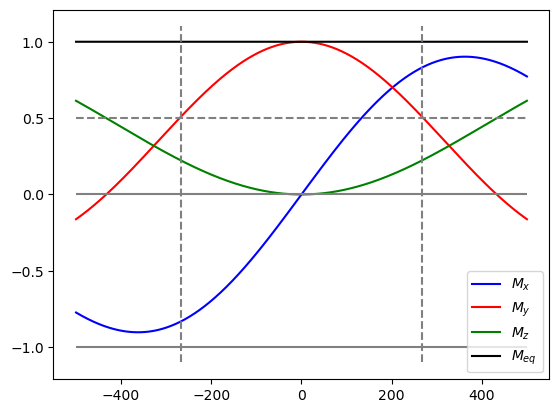

In [6]:
deltaOmegaZRange = np.linspace(start=-500, stop=500, num=5001, endpoint=True)

offsetSweepTraj = []

for freqOffset in deltaOmegaZRange:
    A = SpSpSelectivity.constructBlochMatrix(
        deltaOmegaZ=freqOffset*2*np.pi, omega1X=omega1X, omega1Y=omega1Y, R_1=R_1, R_2=R_2)
    overallPropagator = SpSpSelectivity.solveAnalyticalBlochStepPropagator(
        A, tau)
    offsetSweepTraj.append(np.dot(overallPropagator, M_0))
offsetSweepTraj = np.asarray(offsetSweepTraj)

plt.figure()
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 0], color='blue', label='$M_x$')
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 1], color='red', label='$M_y$')
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 2], color='green', label='$M_z$')
plt.plot(deltaOmegaZRange,
         offsetSweepTraj[:, 3], color='black', label='$M_{eq}$')

plt.hlines(y=.5, xmax=500, xmin=-500, linestyles='dashed', color='grey')
plt.hlines(y=.0, xmax=500, xmin=-500, linestyles='solid', color='grey')
plt.hlines(y=-1., xmax=500, xmin=-500, linestyles='solid', color='grey')

plt.vlines(x=267, ymax=1.1, ymin=-1.1, linestyles='dashed', color='grey')
plt.vlines(x=-267, ymax=1.1, ymin=-1.1, linestyles='dashed', color='grey')


plt.legend(loc='best')
plt.show()

## Gaussian Pulse

Then we go to a 1-ms long Gaussian pulse. We use a 100 step approximation, cutting off at 1%.


0.003367090077063996 0.3987479744270368 118.42509861652806 15.989435673179225


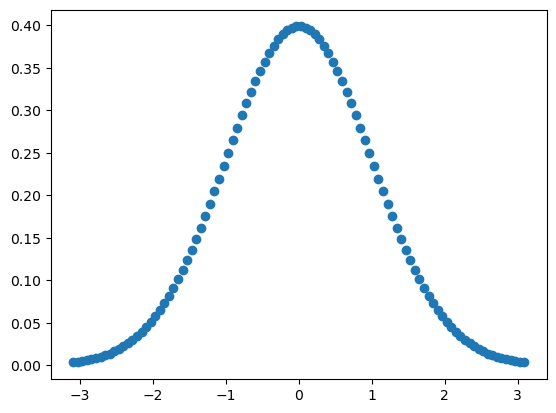

In [7]:
cutoff = 0.001
x = np.linspace(scipy.stats.norm.ppf(cutoff),
                scipy.stats.norm.ppf(1-cutoff), 100)
gauss_x = scipy.stats.norm.pdf(x)
plt.scatter(x, gauss_x)

print(gauss_x[0], gauss_x[50], gauss_x[50]/gauss_x[0], np.sum(gauss_x))

In [8]:
def solveBlochRfWaveformPropagatorList(rfwaveformX: np.array, rfwaveformY: np.array, Tau: float, offsetZ: float = 0, R_1: float = 0, R_2: float = 0):
    nSteps = len(rfwaveformX)

    if not (nSteps == len(rfwaveformY)):
        raise ValueError(
            f"rfwaveformX ({len(rfwaveformX)}) and rfwaveformY ({len(rfwaveformY)}) are not of equal length")

    dTau = Tau / nSteps

    propagatorList = []

    for idx, rfVals in enumerate(zip(rfwaveformX, rfwaveformY)):
        BlochMat = np.array([[-R_2, offsetZ, -rfVals[1], 0], [-offsetZ, -R_2,
                            rfVals[0], 0], [rfVals[1], -rfVals[0], R_1, R_1], [0, 0, 0, 0]])
        propagator = scipy.linalg.expm(BlochMat*dTau)
        propagatorList.append(propagator)

    return propagatorList


def solveBlochRfWaveformTraj(initialState: np.array, rfwaveformX: np.array, rfwaveformY: np.array, Tau: float, offsetZ: float = 0, R_1: float = 0, R_2: float = 0):

    nSteps = len(rfwaveformX)

    if not (nSteps == len(rfwaveformY)):
        raise ValueError(
            f"rfwaveformX ({len(rfwaveformX)}) and rfwaveformY ({len(rfwaveformY)}) are not of equal length")

    dTau = Tau / nSteps

    mTrajList = []
    mTrajList.append(initialState)
    M_0 = initialState

    for idx, rfVals in enumerate(zip(rfwaveformX, rfwaveformY)):
        BlochMat = np.array([[-R_2, offsetZ, -rfVals[1], 0], [-offsetZ, -R_2,
                            rfVals[0], 0], [rfVals[1], -rfVals[0], R_1, R_1], [0, 0, 0, 0]])
        propagator = scipy.linalg.expm(BlochMat*dTau)
        M_0 = np.dot(propagator, M_0)
        mTrajList.append(M_0)

    return np.asarray(mTrajList, dtype=np.float64)


def solveBlochRfWaveformOverallPropagator(rfwaveformX: np.array, rfwaveformY: np.array, Tau: float, offsetZ: float = 0, R_1: float = 0, R_2: float = 0):
    nSteps = len(rfwaveformX)

    if not (nSteps == len(rfwaveformY)):
        raise ValueError(
            f"rfwaveformX ({len(rfwaveformX)}) and rfwaveformY ({len(rfwaveformY)}) are not of equal length")

    dTau = Tau / nSteps

    propagatorList = []

    for idx, rfVals in enumerate(zip(rfwaveformX, rfwaveformY)):
        BlochMat = np.array([[-R_2, offsetZ, -rfVals[1], 0], [-offsetZ, -R_2,
                            rfVals[0], 0], [rfVals[1], -rfVals[0], R_1, R_1], [0, 0, 0, 0]])
        if idx == 0:
            propagator = scipy.linalg.expm(BlochMat*dTau)
        else:
            propagator = np.dot(scipy.linalg.expm(BlochMat*dTau), propagator)

    return propagator

### Trajectory of Magnetization Vector under 1-ms 90deg Gaussian pulse


3917.285552469754


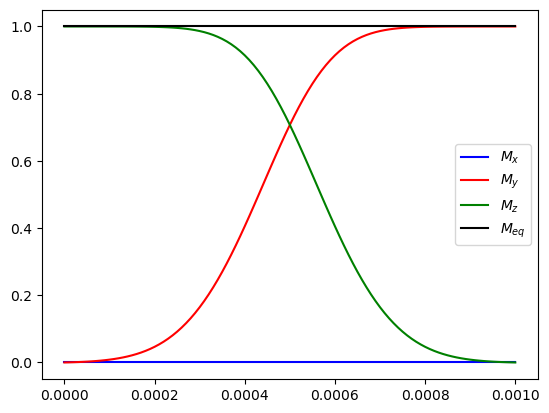

In [9]:
gauss_x /= np.max(gauss_x)
gauss_x *= len(gauss_x) / np.sum(gauss_x) * 250 * 2 * np.pi
print(np.max(gauss_x))

tmpTraj = solveBlochRfWaveformTraj(
    initialState=M_0, rfwaveformX=gauss_x, rfwaveformY=(gauss_x*0), Tau=1e-3)
dTauRange = np.linspace(start=0, stop=1e-3, num=(1+len(gauss_x)))

plt.figure()
plt.plot(dTauRange, tmpTraj[:, 0], color='blue', label='$M_x$')
plt.plot(dTauRange, tmpTraj[:, 1], color='red', label='$M_y$')
plt.plot(dTauRange, tmpTraj[:, 2], color='green', label='$M_z$')
plt.plot(dTauRange, tmpTraj[:, 3], color='black', label='$M_{eq}$')

# plt.hlines(y=.5,xmax=500,xmin=-500,linestyles='dashed',color='grey')

# plt.vlines(x=1000,ymax=1.1,ymin=-1.1,linestyles='dashed',color='grey')
# plt.vlines(x=-1000,ymax=1.1,ymin=-1.1,linestyles='dashed',color='grey')


plt.legend(loc='best')
plt.show()

In [10]:
overallPropagator = solveBlochRfWaveformOverallPropagator(
    rfwaveformX=gauss_x, rfwaveformY=(gauss_x*0), Tau=1e-3)
print(np.dot(overallPropagator, M_0))

overallPropagator = solveBlochRfWaveformOverallPropagator(
    rfwaveformX=gauss_x, rfwaveformY=(gauss_x*0), offsetZ=0, Tau=1e-3)
print(np.dot(overallPropagator, M_0))

[[ 0.00000000e+00]
 [ 1.00000000e+00]
 [-2.57281176e-16]
 [ 1.00000000e+00]]
[[ 0.00000000e+00]
 [ 1.00000000e+00]
 [-2.57281176e-16]
 [ 1.00000000e+00]]


### Frequence responce of RF pulse with offset

Then we do a _z_-freq. sweep with this gaussian shape


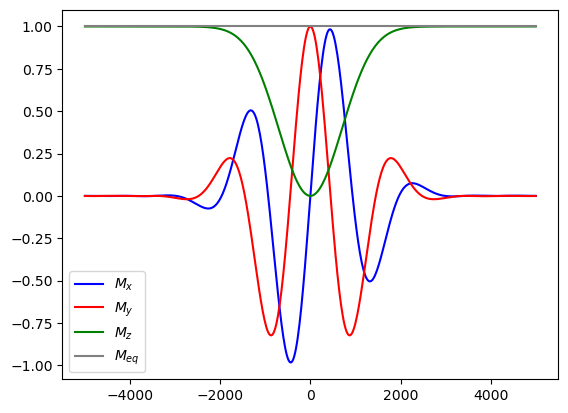

In [11]:
deltaOmegaZRange = np.linspace(start=-5000, stop=5000, num=501, endpoint=True)

offsetSweepTraj = []

for freqOffset in deltaOmegaZRange:
    overallPropagator = solveBlochRfWaveformOverallPropagator(
        rfwaveformX=gauss_x, rfwaveformY=(gauss_x*0), offsetZ=freqOffset*2*np.pi, Tau=1e-3)

    offsetSweepTraj.append(np.dot(overallPropagator, M_0))
offsetSweepTraj = np.asarray(offsetSweepTraj)

plt.figure()
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 0], color='blue', label='$M_x$')
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 1], color='red', label='$M_y$')
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 2], color='green', label='$M_z$')
plt.plot(deltaOmegaZRange,
         offsetSweepTraj[:, 3], color='grey', label='$M_{eq}$')

plt.legend(loc='best')
plt.show()

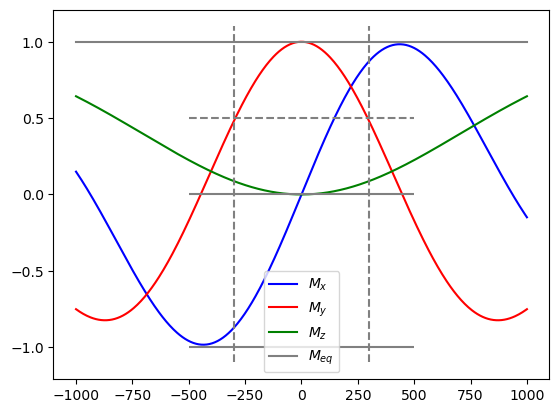

In [12]:
deltaOmegaZRange = np.linspace(start=-1000, stop=1000, num=501, endpoint=True)

offsetSweepTraj = []

for freqOffset in deltaOmegaZRange:
    overallPropagator = solveBlochRfWaveformOverallPropagator(
        rfwaveformX=gauss_x, rfwaveformY=(gauss_x*0), offsetZ=freqOffset*2*np.pi, Tau=1e-3)

    offsetSweepTraj.append(np.dot(overallPropagator, M_0))
offsetSweepTraj = np.asarray(offsetSweepTraj)

plt.figure()
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 0], color='blue', label='$M_x$')
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 1], color='red', label='$M_y$')
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 2], color='green', label='$M_z$')
plt.plot(deltaOmegaZRange,
         offsetSweepTraj[:, 3], color='grey', label='$M_{eq}$')

plt.hlines(y=.5, xmax=500, xmin=-500, linestyles='dashed', color='grey')
plt.hlines(y=.0, xmax=500, xmin=-500, linestyles='solid', color='grey')
plt.hlines(y=-1, xmax=500, xmin=-500, linestyles='solid', color='grey')

plt.vlines(x=298, ymax=1.1, ymin=-1.1, linestyles='dashed', color='grey')
plt.vlines(x=-298, ymax=1.1, ymin=-1.1, linestyles='dashed', color='grey')


plt.legend(loc='best')
plt.show()

# DANTE Train

Then we are to construct a 1-ms DANTE train with a total on-res. rotation that equals to 90 deg.


RF part we use 20-us Gaussians


0.003367090077063996 0.3987479744270368 118.42509861652806 15.989435673179225
195864.2776234877


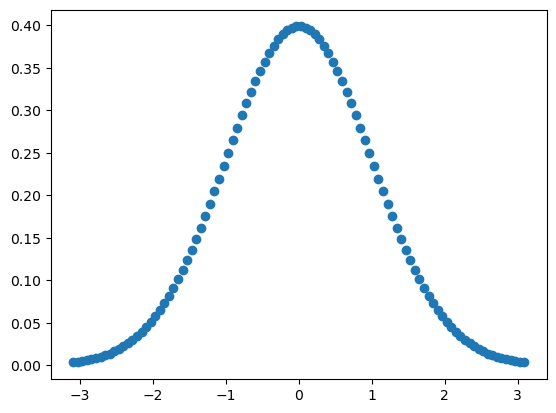

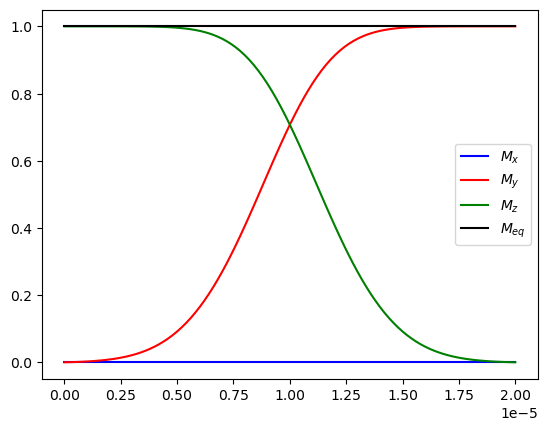

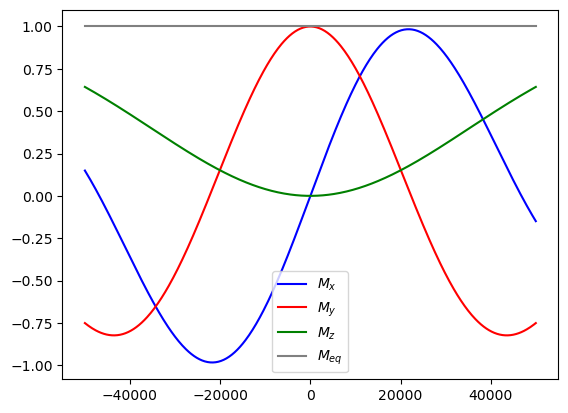

In [13]:
cutoff = 0.001
x = np.linspace(scipy.stats.norm.ppf(cutoff),
                scipy.stats.norm.ppf(1-cutoff), 100)
gauss_x = scipy.stats.norm.pdf(x)
plt.scatter(x, gauss_x)

print(gauss_x[0], gauss_x[50], gauss_x[50]/gauss_x[0], np.sum(gauss_x))

gauss_x /= np.max(gauss_x)
gauss_x *= len(gauss_x) / np.sum(gauss_x) * 250 * 2 * np.pi * 50
print(np.max(gauss_x))

pulseDur = 20e-6
tmpTraj = solveBlochRfWaveformTraj(
    initialState=M_0, rfwaveformX=gauss_x, rfwaveformY=(gauss_x*0), Tau=pulseDur)
dTauRange = np.linspace(start=0, stop=pulseDur, num=(1+len(gauss_x)))

plt.figure()
plt.plot(dTauRange, tmpTraj[:, 0], color='blue', label='$M_x$')
plt.plot(dTauRange, tmpTraj[:, 1], color='red', label='$M_y$')
plt.plot(dTauRange, tmpTraj[:, 2], color='green', label='$M_z$')
plt.plot(dTauRange, tmpTraj[:, 3], color='black', label='$M_{eq}$')

# plt.hlines(y=.5,xmax=500,xmin=-500,linestyles='dashed',color='grey')

# plt.vlines(x=1000,ymax=1.1,ymin=-1.1,linestyles='dashed',color='grey')
# plt.vlines(x=-1000,ymax=1.1,ymin=-1.1,linestyles='dashed',color='grey')

plt.legend(loc='best')
plt.show()

deltaOmegaZRange = np.linspace(
    start=-50000, stop=50000, num=501, endpoint=True)

offsetSweepTraj = []

for freqOffset in deltaOmegaZRange:
    overallPropagator = solveBlochRfWaveformOverallPropagator(
        rfwaveformX=gauss_x, rfwaveformY=(gauss_x*0), offsetZ=freqOffset*2*np.pi, Tau=20e-6)

    offsetSweepTraj.append(np.dot(overallPropagator, M_0))
offsetSweepTraj = np.asarray(offsetSweepTraj)

plt.figure()
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 0], color='blue', label='$M_x$')
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 1], color='red', label='$M_y$')
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 2], color='green', label='$M_z$')
plt.plot(deltaOmegaZRange,
         offsetSweepTraj[:, 3], color='grey', label='$M_{eq}$')

plt.legend(loc='best')
plt.show()

100


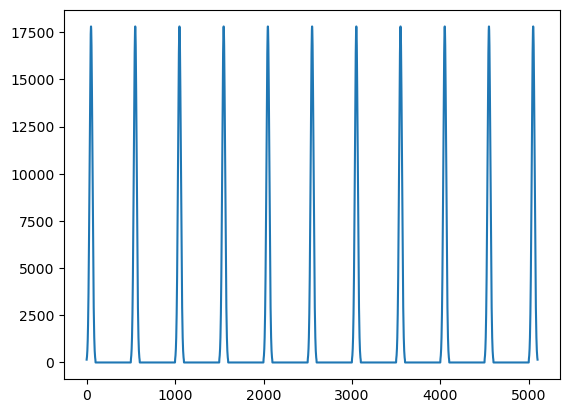

In [14]:
from copy import deepcopy
print(len(gauss_x))
zeros900 = np.zeros(400)

dante_gauss_x = gauss_x / 11
danteTrain = deepcopy(dante_gauss_x)
for i in range(10):
    danteTrain = np.concatenate((danteTrain, zeros900, dante_gauss_x))

plt.figure()
plt.plot(danteTrain)
plt.show()

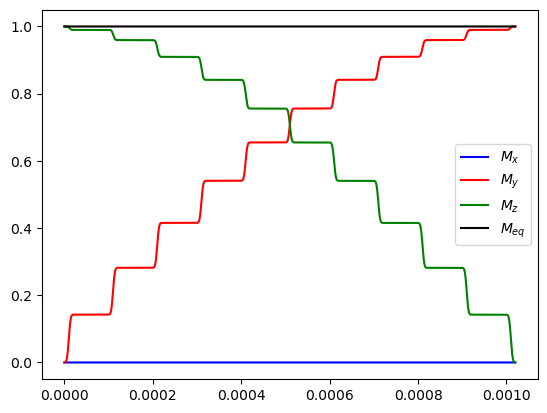

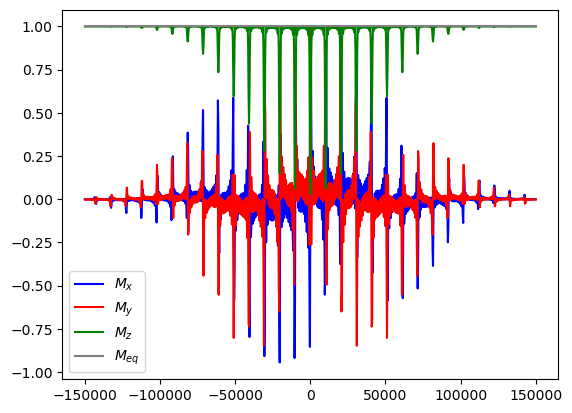

In [15]:
pulseDur = 1.02e-3
tmpTraj = solveBlochRfWaveformTraj(
    initialState=M_0, rfwaveformX=danteTrain, rfwaveformY=(danteTrain*0), Tau=pulseDur)
dTauRange = np.linspace(start=0, stop=pulseDur, num=(1+len(danteTrain)))

plt.figure()
plt.plot(dTauRange, tmpTraj[:, 0], color='blue', label='$M_x$')
plt.plot(dTauRange, tmpTraj[:, 1], color='red', label='$M_y$')
plt.plot(dTauRange, tmpTraj[:, 2], color='green', label='$M_z$')
plt.plot(dTauRange, tmpTraj[:, 3], color='black', label='$M_{eq}$')


plt.legend(loc='best')
plt.show()


deltaOmegaZRange = np.linspace(
    start=-150000, stop=150000, num=1001, endpoint=True)

offsetSweepTraj = []

for freqOffset in deltaOmegaZRange:
    overallPropagator = solveBlochRfWaveformOverallPropagator(
        rfwaveformX=danteTrain, rfwaveformY=(danteTrain*0), offsetZ=freqOffset*2*np.pi, Tau=1e-3)

    offsetSweepTraj.append(np.dot(overallPropagator, M_0))
offsetSweepTraj = np.asarray(offsetSweepTraj)

plt.figure()
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 0], color='blue', label='$M_x$')
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 1], color='red', label='$M_y$')
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 2], color='green', label='$M_z$')
plt.plot(deltaOmegaZRange,
         offsetSweepTraj[:, 3], color='grey', label='$M_{eq}$')

plt.legend(loc='best')
plt.show()

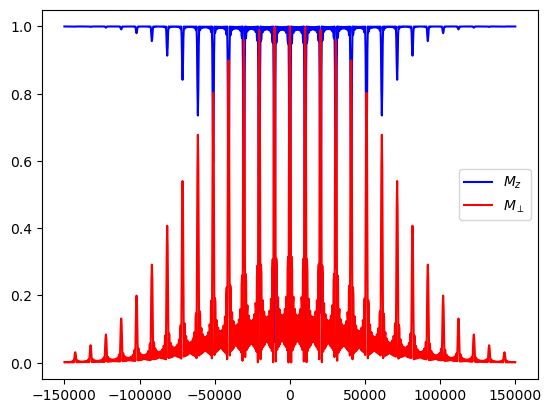

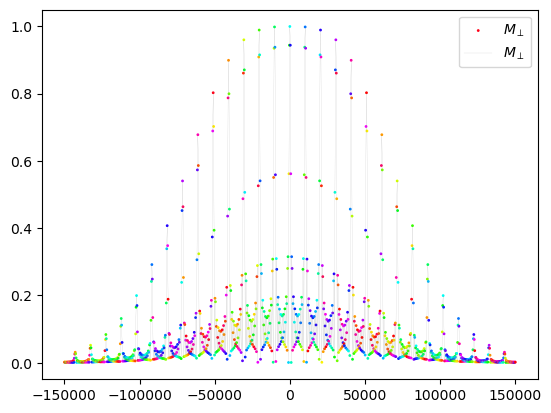

In [16]:
M_z = offsetSweepTraj[:, 2]
M_trans = offsetSweepTraj[:, 1] + offsetSweepTraj[:, 0] * 1j

plt.figure()
plt.plot(deltaOmegaZRange,        M_z, color='blue', label='$M_z$')
plt.plot(deltaOmegaZRange, np.abs(M_trans), color='red', label='$M_{\perp}$')
plt.legend(loc='best')
plt.show()

plt.figure()
plt.scatter(deltaOmegaZRange, np.abs(M_trans), s=1,
            c=np.angle(M_trans), cmap='hsv',  label='$M_{\perp}$')
plt.plot(deltaOmegaZRange, np.abs(M_trans), linewidth=.1,
         color='grey', alpha=.7,  label='$M_{\perp}$')

plt.legend(loc='best')
plt.show()

This method is too slow. We adopt again the trick of propagator-recycling, since the calculation of propagator with Lie algebra (esp. from non-full rank matrices) is the slowest part of the whole process.


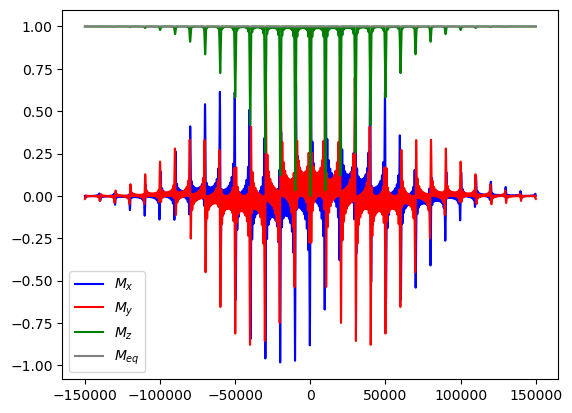

In [17]:
zeros80us = np.zeros(1)

deltaOmegaZRange = np.linspace(
    start=-150000, stop=150000, num=5001, endpoint=True)

offsetSweepTraj = []

for freqOffset in deltaOmegaZRange:
    zeroDelayPropagator = solveBlochRfWaveformOverallPropagator(
        rfwaveformX=zeros80us, rfwaveformY=zeros80us, offsetZ=freqOffset*2*np.pi, Tau=80e-6)
    gaussianPropagator = solveBlochRfWaveformOverallPropagator(
        rfwaveformX=dante_gauss_x, rfwaveformY=(dante_gauss_x*0), offsetZ=freqOffset*2*np.pi, Tau=20e-6)

    overallPropagator = gaussianPropagator
    for iter in range(10):
        overallPropagator = np.dot(zeroDelayPropagator, overallPropagator)
        overallPropagator = np.dot(gaussianPropagator, overallPropagator)

    offsetSweepTraj.append(np.dot(overallPropagator, M_0))
offsetSweepTraj = np.asarray(offsetSweepTraj)

plt.figure()
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 0], color='blue', label='$M_x$')
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 1], color='red', label='$M_y$')
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 2], color='green', label='$M_z$')
plt.plot(deltaOmegaZRange,
         offsetSweepTraj[:, 3], color='grey', label='$M_{eq}$')

plt.legend(loc='best')
plt.show()

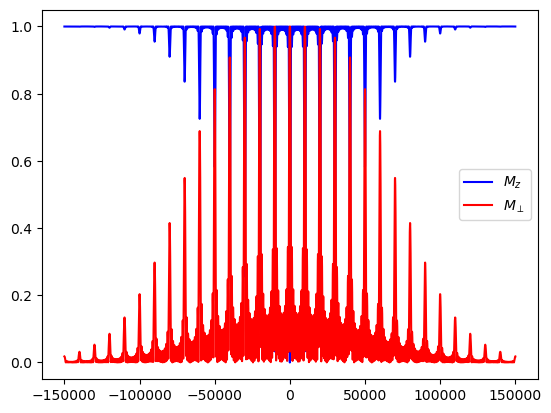

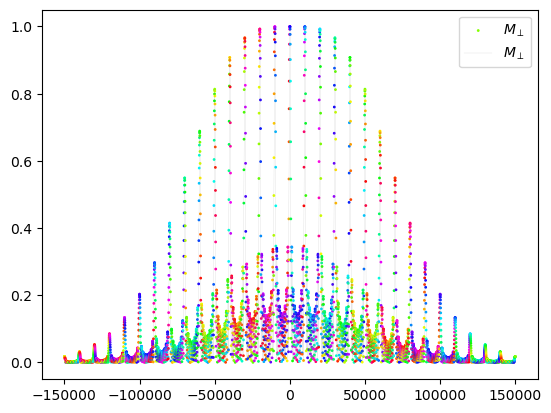

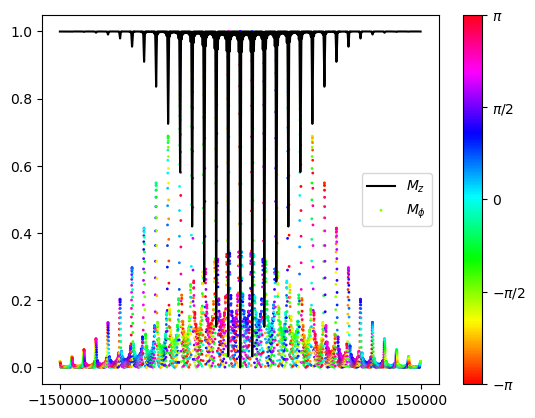

In [20]:
M_z = offsetSweepTraj[:, 2]
M_trans = offsetSweepTraj[:, 0] + offsetSweepTraj[:, 1] * 1j

plt.figure()
plt.plot(deltaOmegaZRange,        M_z, color='blue', label='$M_z$')
plt.plot(deltaOmegaZRange, np.abs(M_trans), color='red', label='$M_{\perp}$')
plt.legend(loc='best')
plt.show()

plt.figure()
plt.scatter(deltaOmegaZRange, np.abs(M_trans), s=1, c=np.angle(M_trans),
            cmap='hsv', alpha=np.power(np.abs(M_trans), 0), label='$M_{\perp}$')
plt.plot(deltaOmegaZRange, np.abs(M_trans), linewidth=.1,
         color='grey', alpha=.7,  label='$M_{\perp}$')

plt.legend(loc='best')
plt.show()


plt.figure()
plt.plot(deltaOmegaZRange, M_z,                     color='black', label='$M_z$')
plt.scatter(deltaOmegaZRange, np.abs(M_trans),         s=1, c=np.angle(M_trans), cmap='hsv', label='$M_{\phi}$')

cbar = plt.colorbar( ticks=[-(np.pi-0.01), -np.pi/2, 0, np.pi/2, np.pi-0.01])
cbar.ax.set_yticklabels(['$-\pi$', '$-\pi/2$','0', '$\pi/2$','$\pi$'])  # vertically oriented colorbar
plt.legend(loc='best')
plt.show()

Here is a drastic acceleration from 500 sec / 1000 pts to 128sec / 15000 pts. A 60 fold increase.

Then we are to see the kinetics of transversal magnetization as a _t_-_f_-graph


In [21]:
M_0T = np.array([[0, 0, 1, 1]])
M_0 = M_0T.T

zeros80us = np.zeros(400)
nbrTimePts = 1020/20*100
nbrFreqPts = 25001
freqStart = -250e3
freqStop = 250e3


deltaOmegaZRange = np.linspace(
    start=freqStart, stop=freqStop, num=nbrFreqPts, endpoint=True)

offsetSweepEvolutionTraj = np.zeros((int(nbrFreqPts), int(nbrTimePts)+1, 4, 1))


for i_freq, freqOffset in enumerate(deltaOmegaZRange):
    zeroDelayPropagatorList = SpSpSelectivity.solveBlochRfWaveformPropagatorList(
        rfwaveformX=zeros80us, rfwaveformY=zeros80us, offsetZ=freqOffset*2*np.pi, Tau=80e-6)
    gaussianPropagatorList = SpSpSelectivity.solveBlochRfWaveformPropagatorList(
        rfwaveformX=dante_gauss_x, rfwaveformY=(dante_gauss_x*0), offsetZ=freqOffset*2*np.pi, Tau=20e-6)

    overallPropagatorList = deepcopy(gaussianPropagatorList)
    
    for iter in range(10):
        overallPropagatorList += zeroDelayPropagatorList
        overallPropagatorList += gaussianPropagatorList

    M_t = M_0
    offsetSweepEvolutionTraj[i_freq, 0] = M_t
    for i_time, propagator in enumerate(overallPropagatorList):
        M_t = np.dot(propagator, M_t)
        offsetSweepEvolutionTraj[i_freq, i_time+1] = M_t


M_trans = offsetSweepEvolutionTraj[:,:,0,0] + offsetSweepEvolutionTraj[:,:,1,0] * 1j


(25001, 5101, 4, 1)


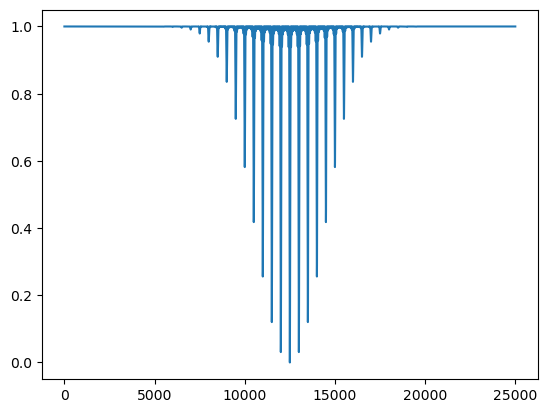

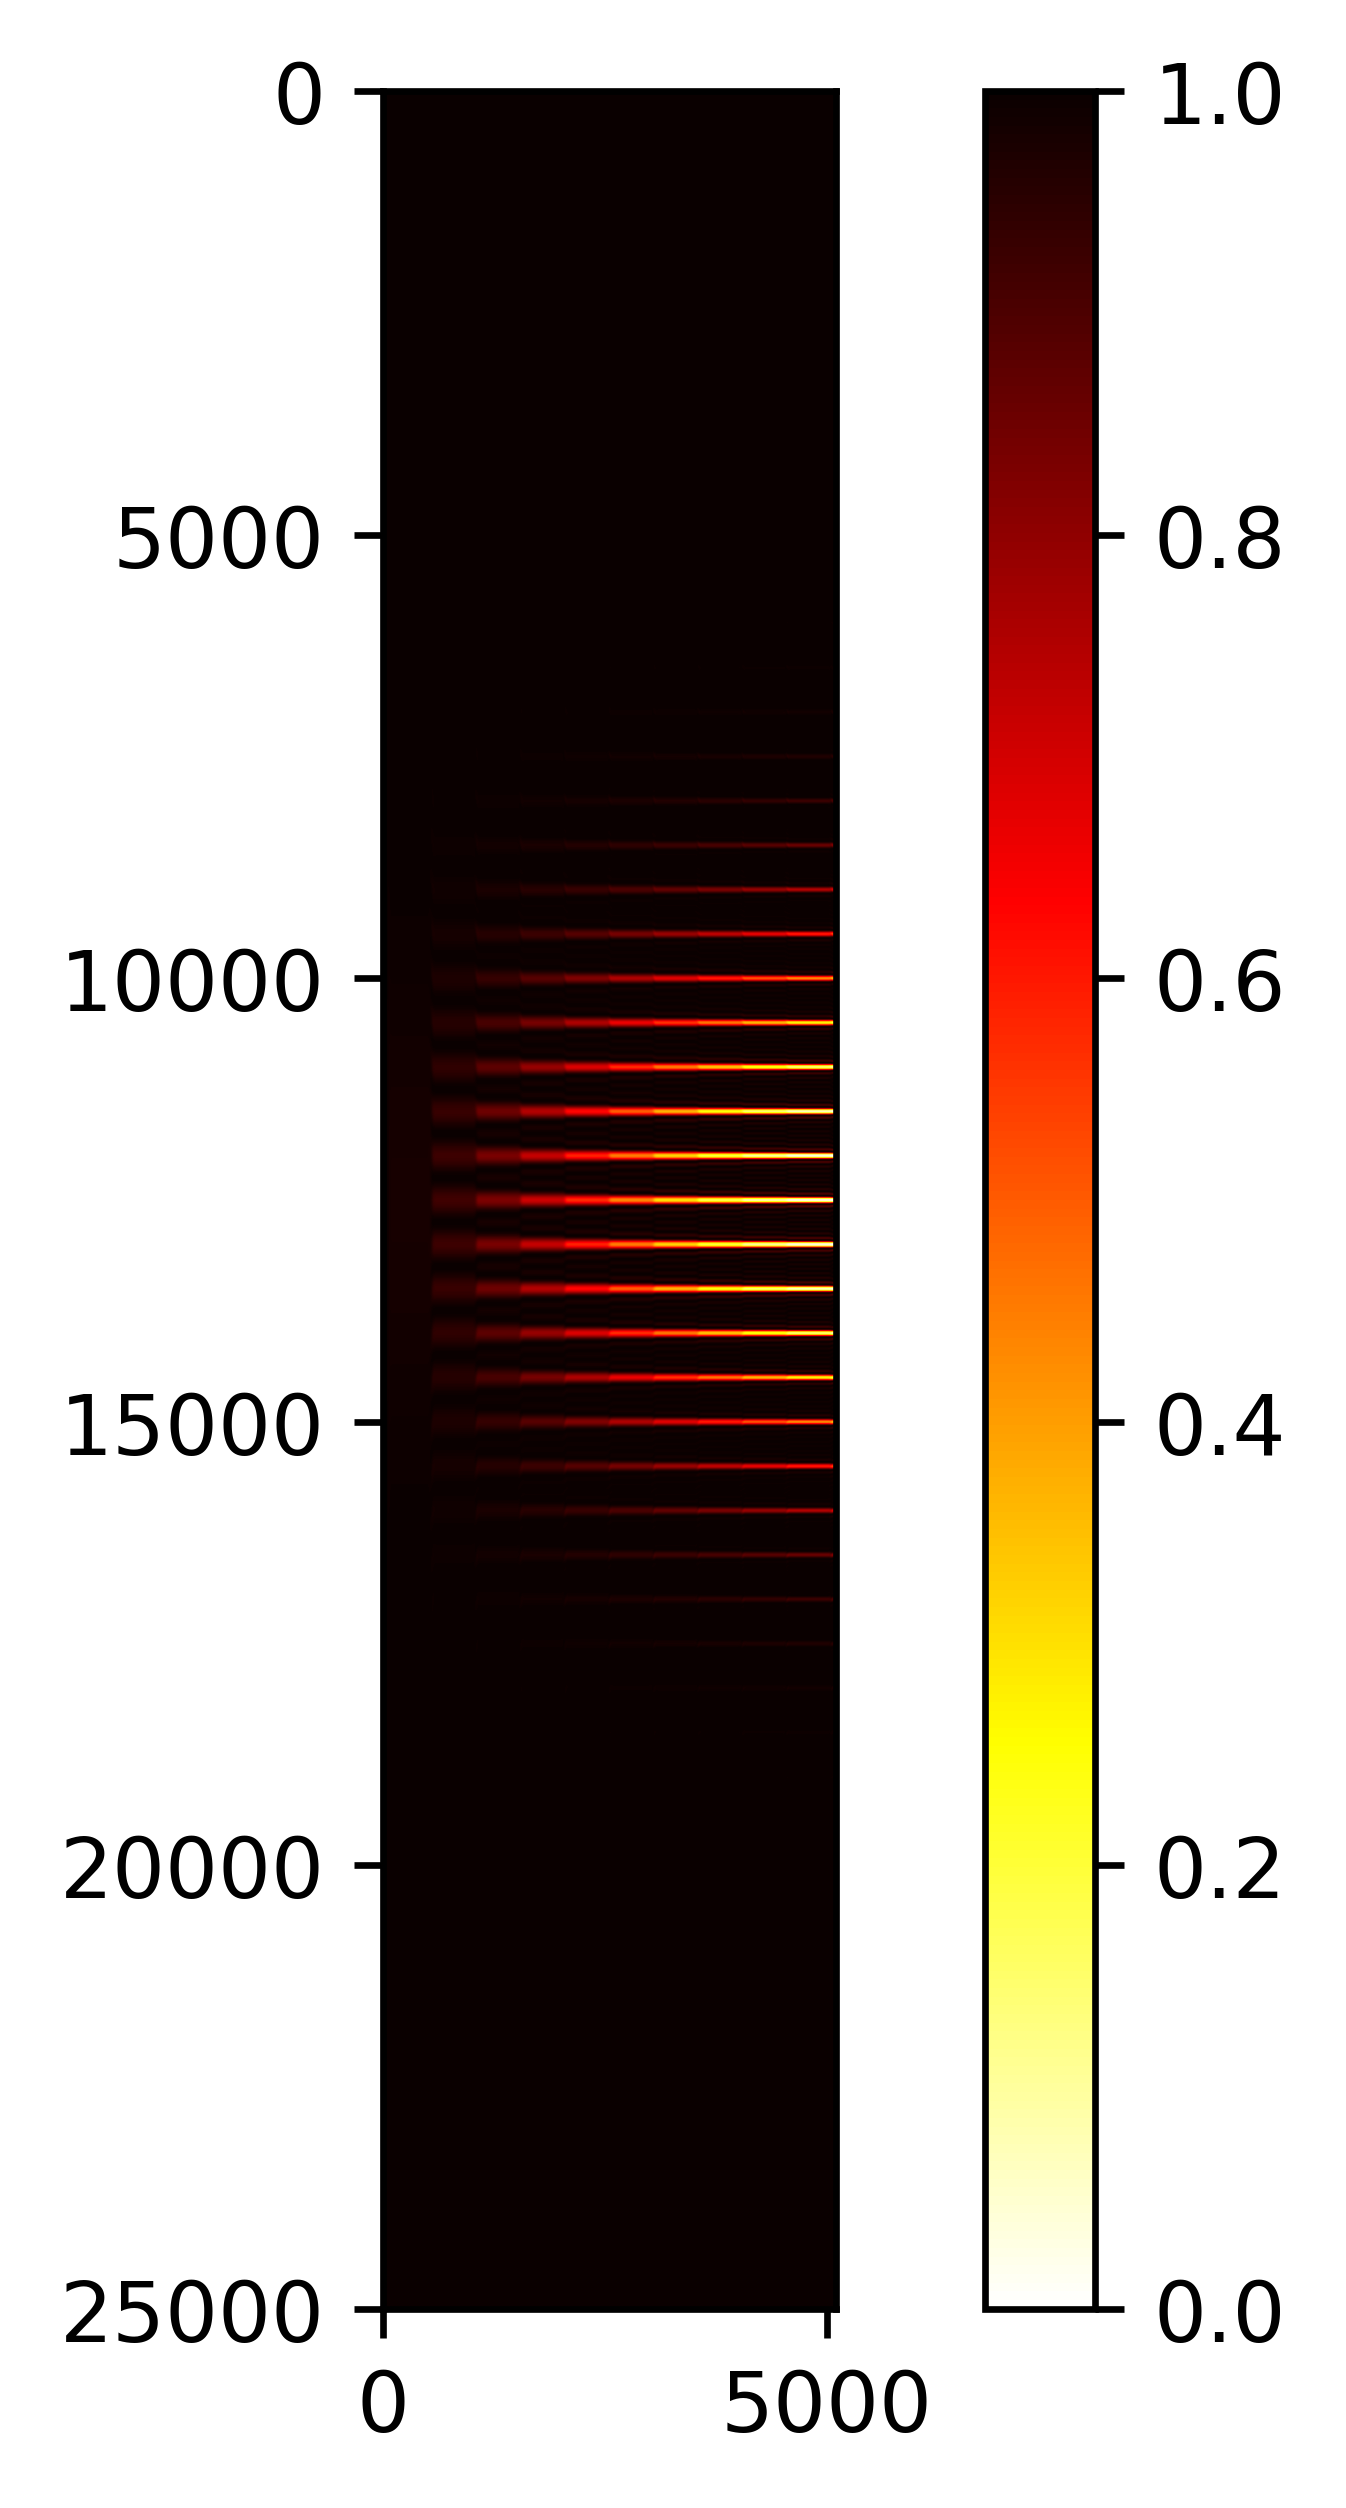

In [22]:
print(np.shape(offsetSweepEvolutionTraj))

plt.figure()
plt.plot(offsetSweepEvolutionTraj[:,-1,2,0])
plt.show()

f_t_M_z = offsetSweepEvolutionTraj[:,:,2,0]

plt.figure(dpi=600)
plt.imshow(np.power(f_t_M_z, 2), vmin=-.0,vmax=1.0,cmap='hot_r')
plt.colorbar()
plt.show()




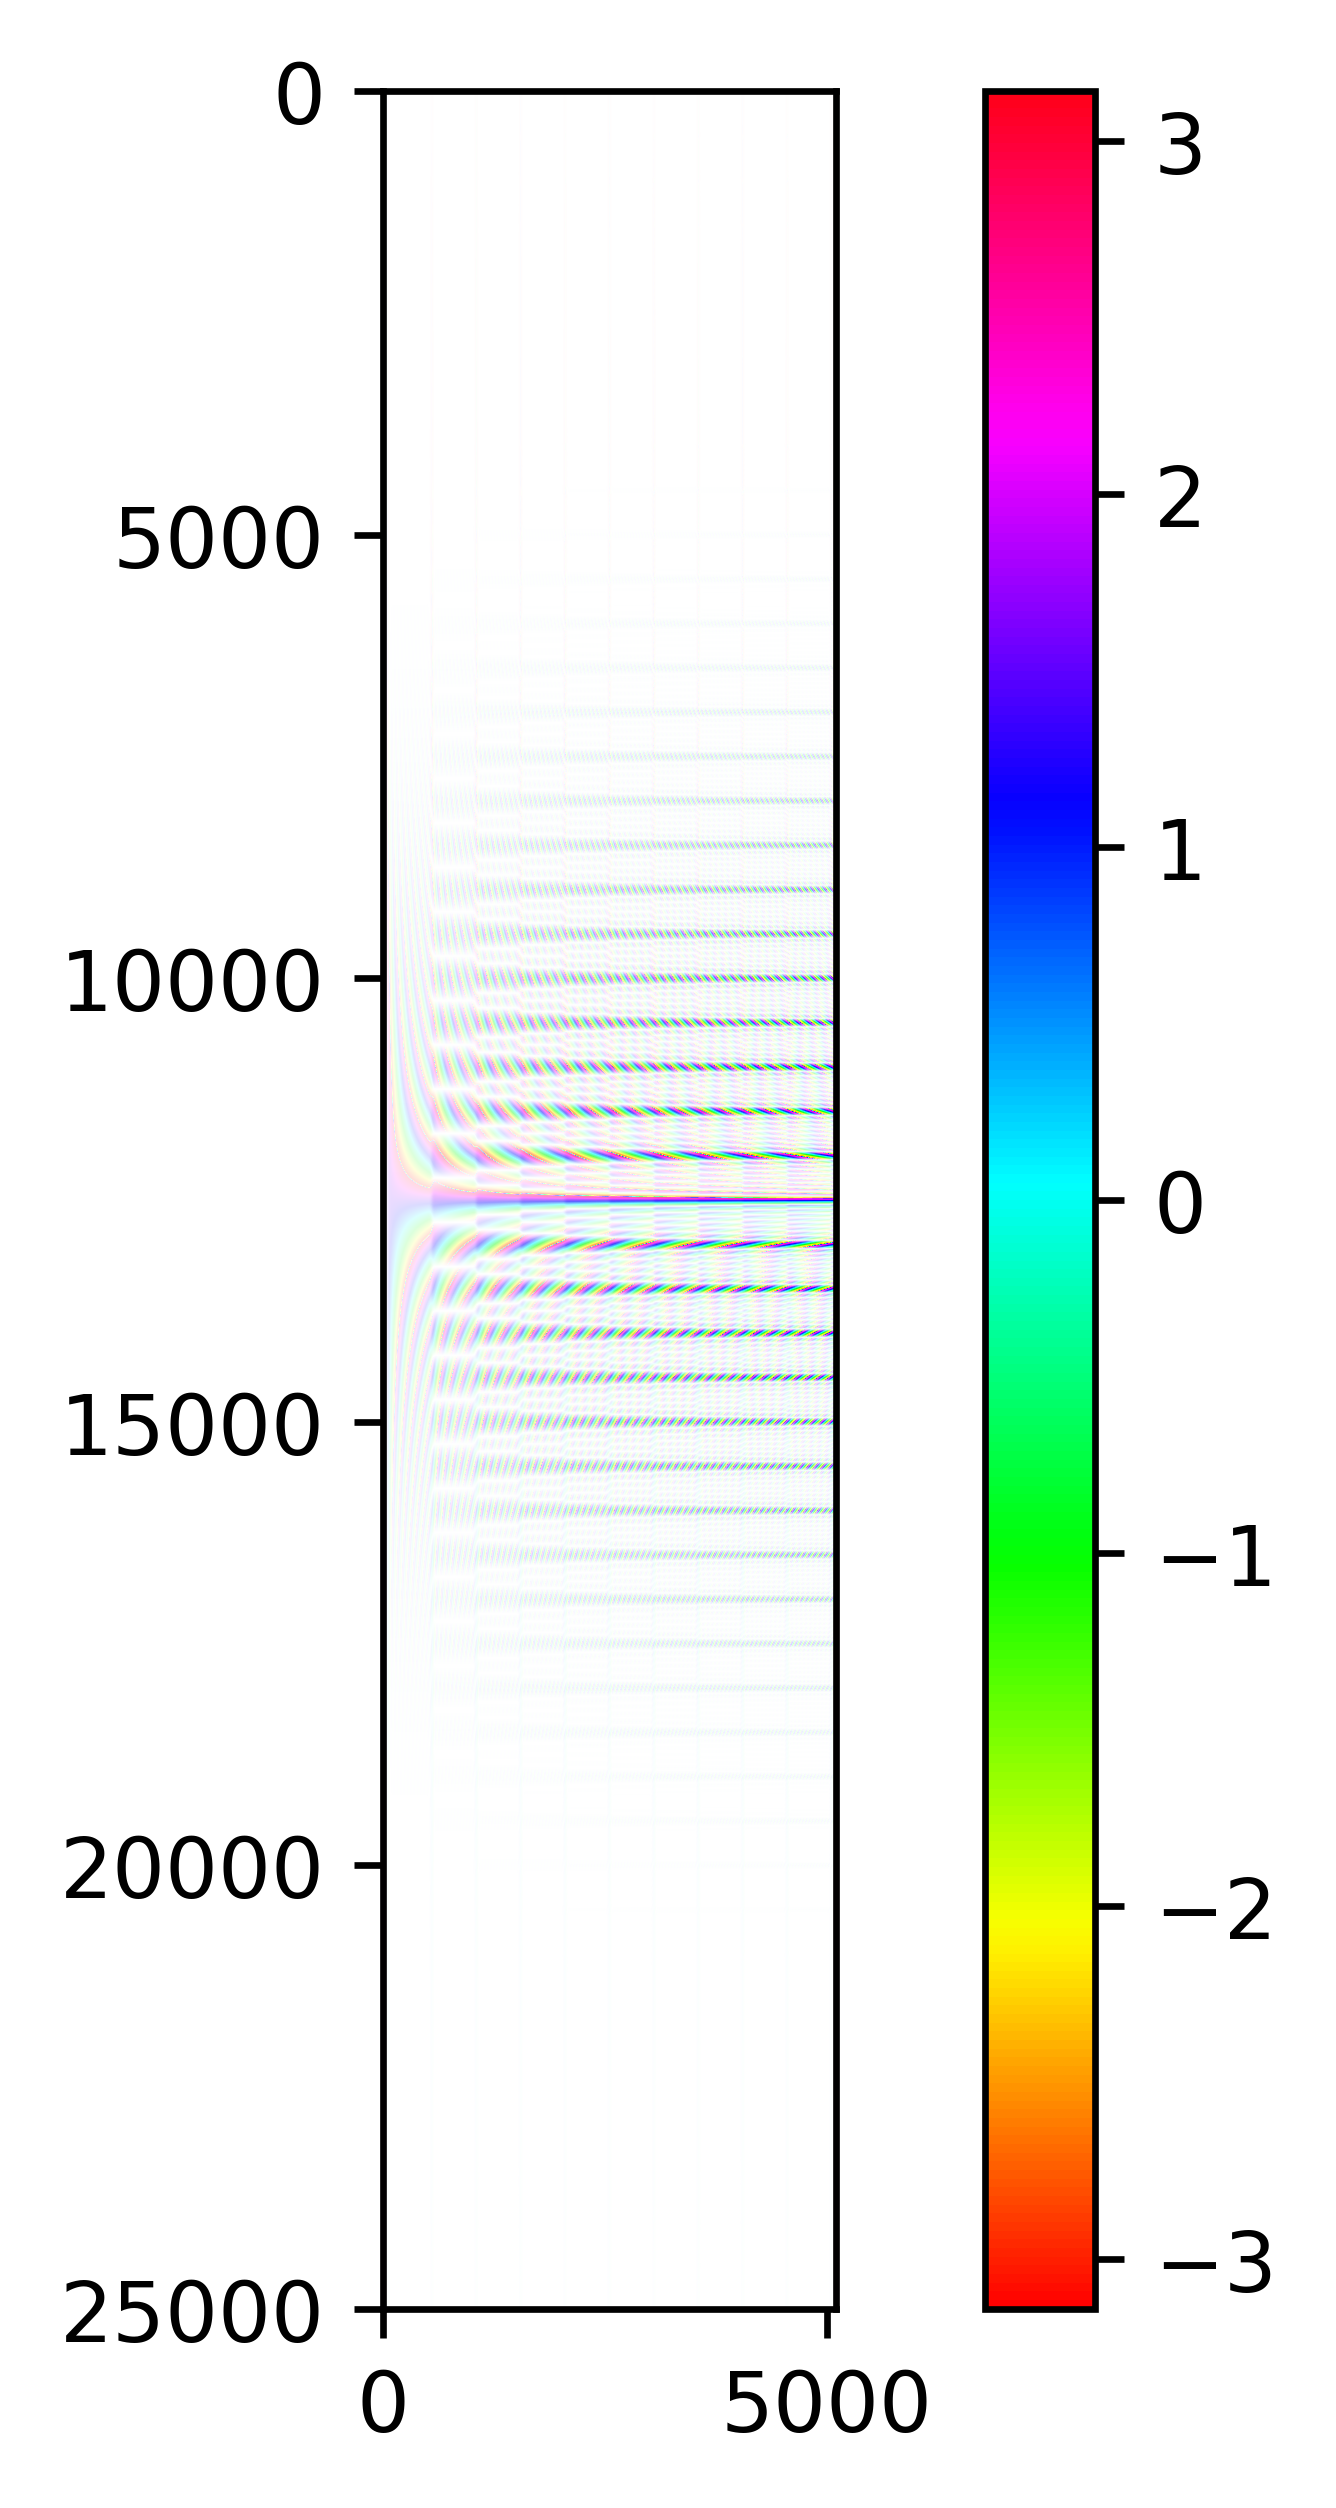

In [23]:
plt.figure(dpi=600)
plt.imshow(np.angle(M_trans), vmin=-np.pi,vmax=np.pi,cmap='hsv', alpha=np.abs(M_trans))
plt.colorbar()


Now we try to impose a Gaussian envelop upon the dante train, hoping it reduces the wiggles

100


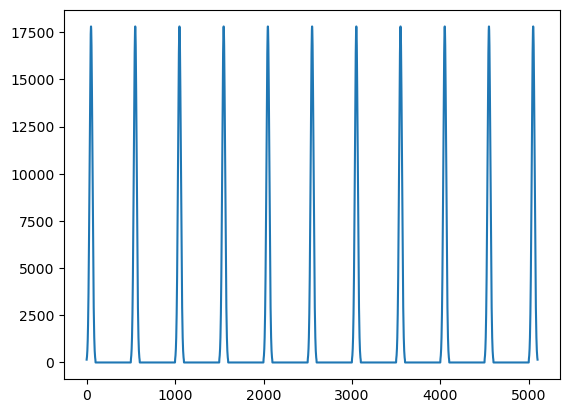

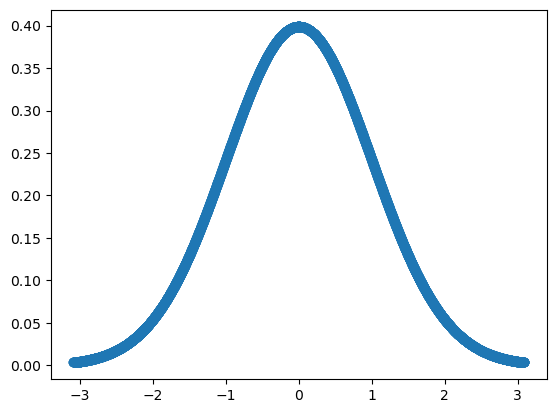

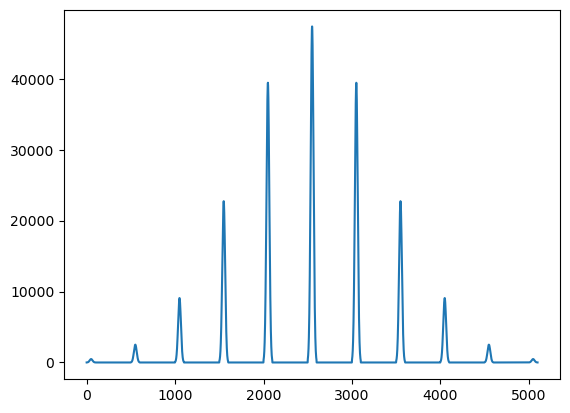

In [24]:
from copy import deepcopy
print(len(gauss_x))
zeros900 = np.zeros(400)

dante_gauss_x = gauss_x / 11
danteTrain = deepcopy(dante_gauss_x)
for i in range(10):
    danteTrain = np.concatenate((danteTrain, zeros900, dante_gauss_x))

plt.figure()
plt.plot(danteTrain)
plt.show()

cutoff = 0.001
x = np.linspace(scipy.stats.norm.ppf(cutoff),
                scipy.stats.norm.ppf(1-cutoff), len(danteTrain))
gaussianEnveloppe = scipy.stats.norm.pdf(x)

plt.figure()
plt.scatter(x, gaussianEnveloppe)
plt.show()

danteTrainGaussian = deepcopy(danteTrain)

danteTrainGaussian = np.multiply(gaussianEnveloppe, danteTrainGaussian)

danteTrainGaussian *= np.sum(danteTrain) / np.sum(danteTrainGaussian)

plt.figure()
plt.plot(danteTrainGaussian)
plt.show()

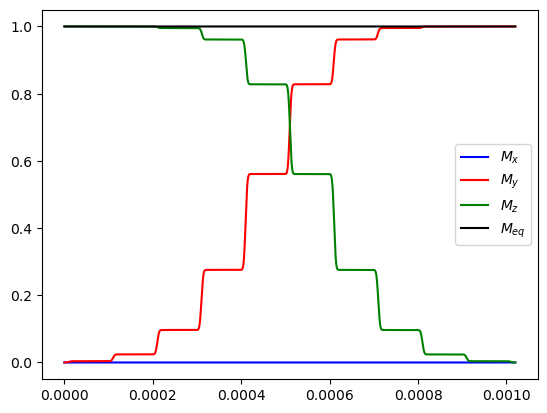

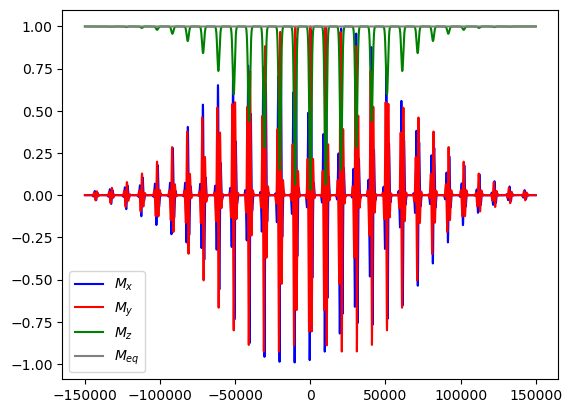

In [35]:
pulseDur = 1.02e-3
tmpTraj = solveBlochRfWaveformTraj(
    initialState=M_0, rfwaveformX=danteTrainGaussian, rfwaveformY=(danteTrainGaussian*0), Tau=pulseDur)
dTauRange = np.linspace(start=0, stop=pulseDur, num=(1+len(danteTrainGaussian)))

plt.figure()
plt.plot(dTauRange, tmpTraj[:, 0], color='blue', label='$M_x$')
plt.plot(dTauRange, tmpTraj[:, 1], color='red', label='$M_y$')
plt.plot(dTauRange, tmpTraj[:, 2], color='green', label='$M_z$')
plt.plot(dTauRange, tmpTraj[:, 3], color='black', label='$M_{eq}$')


plt.legend(loc='best')
plt.show()


deltaOmegaZRange = np.linspace(
    start=-150000, stop=150000, num=15001, endpoint=True)

offsetSweepTraj = []

for freqOffset in deltaOmegaZRange:
    overallPropagator = solveBlochRfWaveformOverallPropagator(
        rfwaveformX=danteTrainGaussian, rfwaveformY=(danteTrainGaussian*0), offsetZ=freqOffset*2*np.pi, Tau=1e-3)

    offsetSweepTraj.append(np.dot(overallPropagator, M_0))
offsetSweepTraj = np.asarray(offsetSweepTraj)

plt.figure()
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 0], color='blue', label='$M_x$')
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 1], color='red', label='$M_y$')
plt.plot(deltaOmegaZRange, offsetSweepTraj[:, 2], color='green', label='$M_z$')
plt.plot(deltaOmegaZRange,
         offsetSweepTraj[:, 3], color='grey', label='$M_{eq}$')

plt.legend(loc='best')
plt.show()

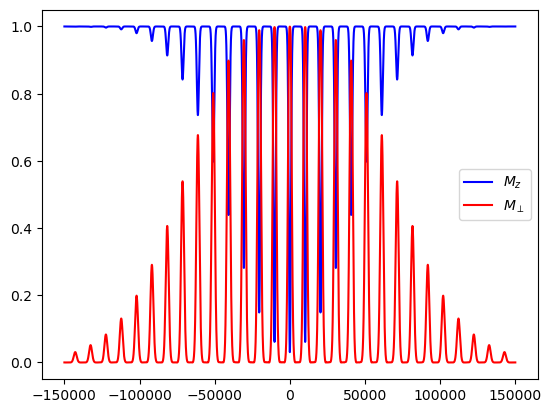

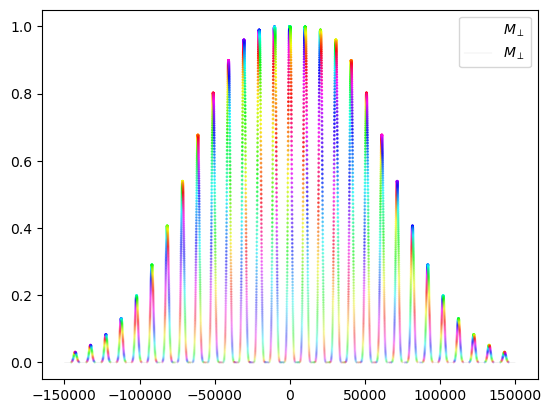

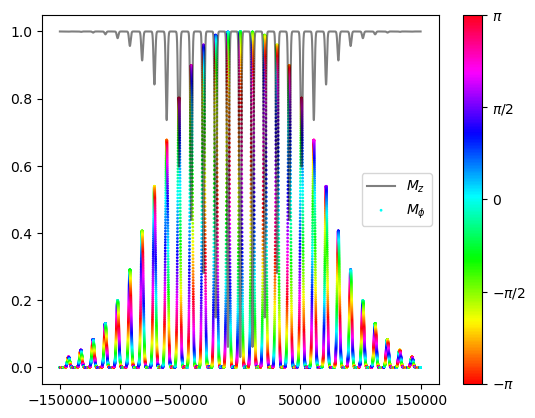

In [36]:
M_z = offsetSweepTraj[:, 2]
M_trans = offsetSweepTraj[:, 1] - offsetSweepTraj[:, 0] * 1j

plt.figure()
plt.plot(deltaOmegaZRange,        M_z, color='blue', label='$M_z$')
plt.plot(deltaOmegaZRange, np.abs(M_trans), color='red', label='$M_{\perp}$')
plt.legend(loc='best')
plt.show()

plt.figure()
plt.scatter(deltaOmegaZRange, np.abs(M_trans), s=1, c=np.angle(M_trans),
            cmap='hsv', alpha=np.power(np.abs(M_trans), 0.732), label='$M_{\perp}$')
plt.plot(deltaOmegaZRange, np.abs(M_trans), linewidth=.1,
         color='grey', alpha=.7,  label='$M_{\perp}$')

plt.legend(loc='best')
plt.show()

plt.figure()
plt.plot(deltaOmegaZRange, M_z,                     color='black', alpha=0.5, label='$M_z$')
plt.scatter(deltaOmegaZRange, np.abs(M_trans),         s=1, c=np.angle(M_trans), cmap='hsv', label='$M_{\phi}$')

cbar = plt.colorbar( ticks=[-(np.pi-0.01), -np.pi/2, 0, np.pi/2, np.pi-0.01])
cbar.ax.set_yticklabels(['$-\pi$', '$-\pi/2$','0', '$\pi/2$','$\pi$'])  # vertically oriented colorbar
plt.legend(loc='best')
plt.show()

Similarly we do a _t_-_f_-analysis here below

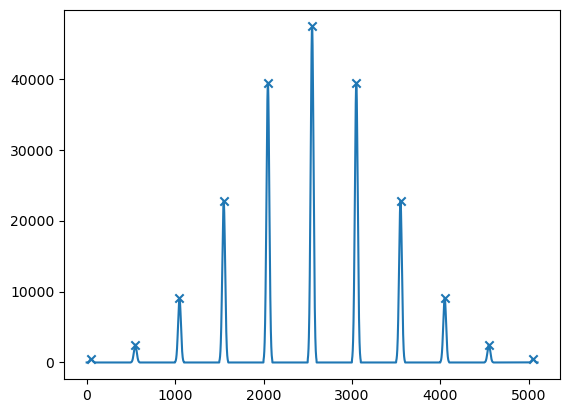

In [27]:
ini = 50
gaussianModProfile = danteTrainGaussian[ini::500]

plt.figure()
plt.plot(range(len(danteTrainGaussian)),danteTrainGaussian)

plt.scatter(range(len(danteTrainGaussian))[ini::500], gaussianModProfile, marker='x')
plt.show()

In [28]:
M_0T = np.array([[0, 0, 1, 1]])
M_0 = M_0T.T

zeros80us = np.zeros(400)
nbrTimePts = 1020/20*100
nbrFreqPts = 25001
freqStart = -250e3
freqStop = 250e3


deltaOmegaZRange = np.linspace(
    start=freqStart, stop=freqStop, num=nbrFreqPts, endpoint=True)

offsetSweepEvolutionTraj = np.zeros((int(nbrFreqPts), int(nbrTimePts)+1, 4, 1))


for i_freq, freqOffset in enumerate(deltaOmegaZRange):
    zeroDelayPropagatorList = SpSpSelectivity.solveBlochRfWaveformPropagatorList(
        rfwaveformX=zeros80us, rfwaveformY=zeros80us, offsetZ=freqOffset*2*np.pi, Tau=80e-6)
    
    

    overallPropagatorList = []
    
    for iter in range(len(gaussianModProfile)):

        gaussianPropagatorList = SpSpSelectivity.solveBlochRfWaveformPropagatorList(
        rfwaveformX=dante_gauss_x*gaussianModProfile[iter]/np.max(dante_gauss_x), rfwaveformY=(dante_gauss_x*0), offsetZ=freqOffset*2*np.pi, Tau=20e-6)
        
        if (iter==0):
            overallPropagatorList += gaussianPropagatorList
        else:
            overallPropagatorList += zeroDelayPropagatorList
            overallPropagatorList += gaussianPropagatorList

    M_t = M_0
    offsetSweepEvolutionTraj[i_freq, 0] = M_t
    for i_time, propagator in enumerate(overallPropagatorList):
        M_t = np.dot(propagator, M_t)
        offsetSweepEvolutionTraj[i_freq, i_time+1] = M_t




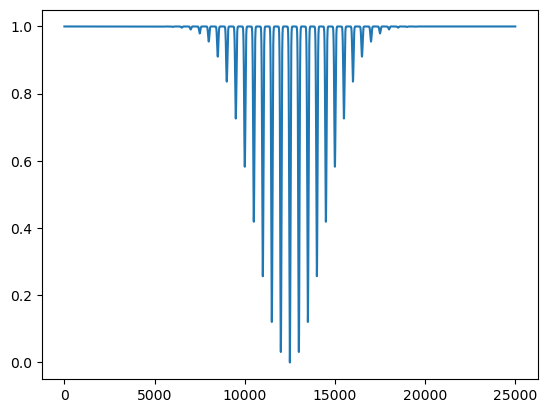

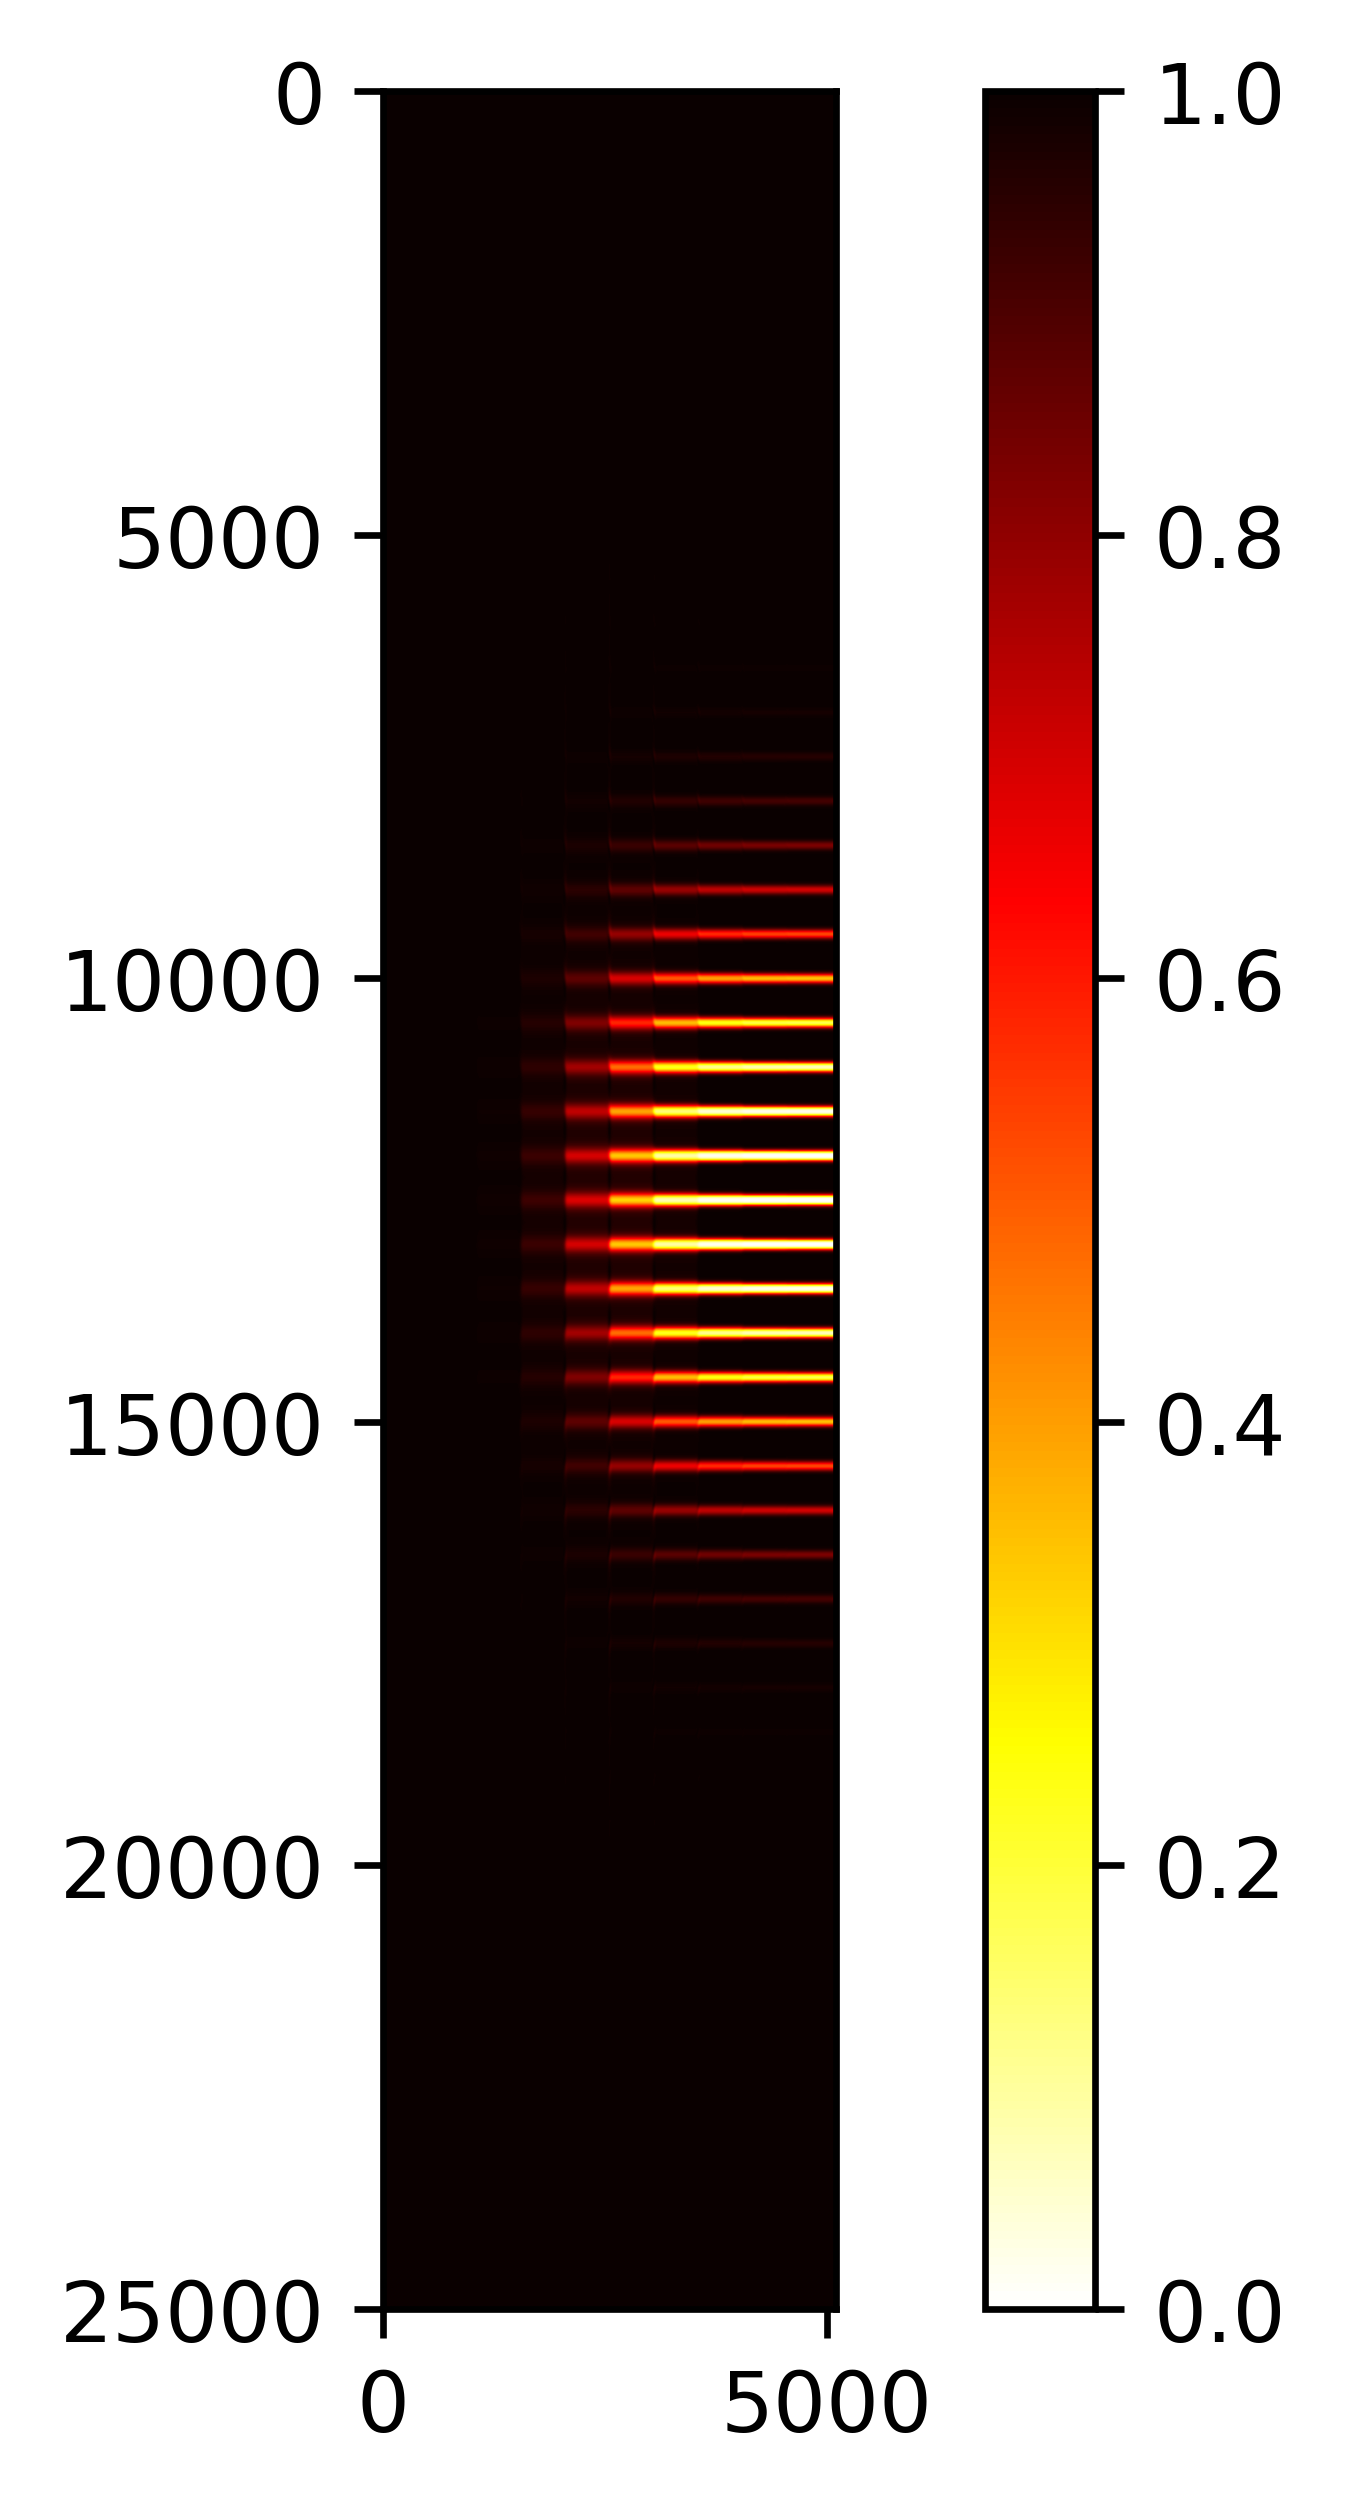

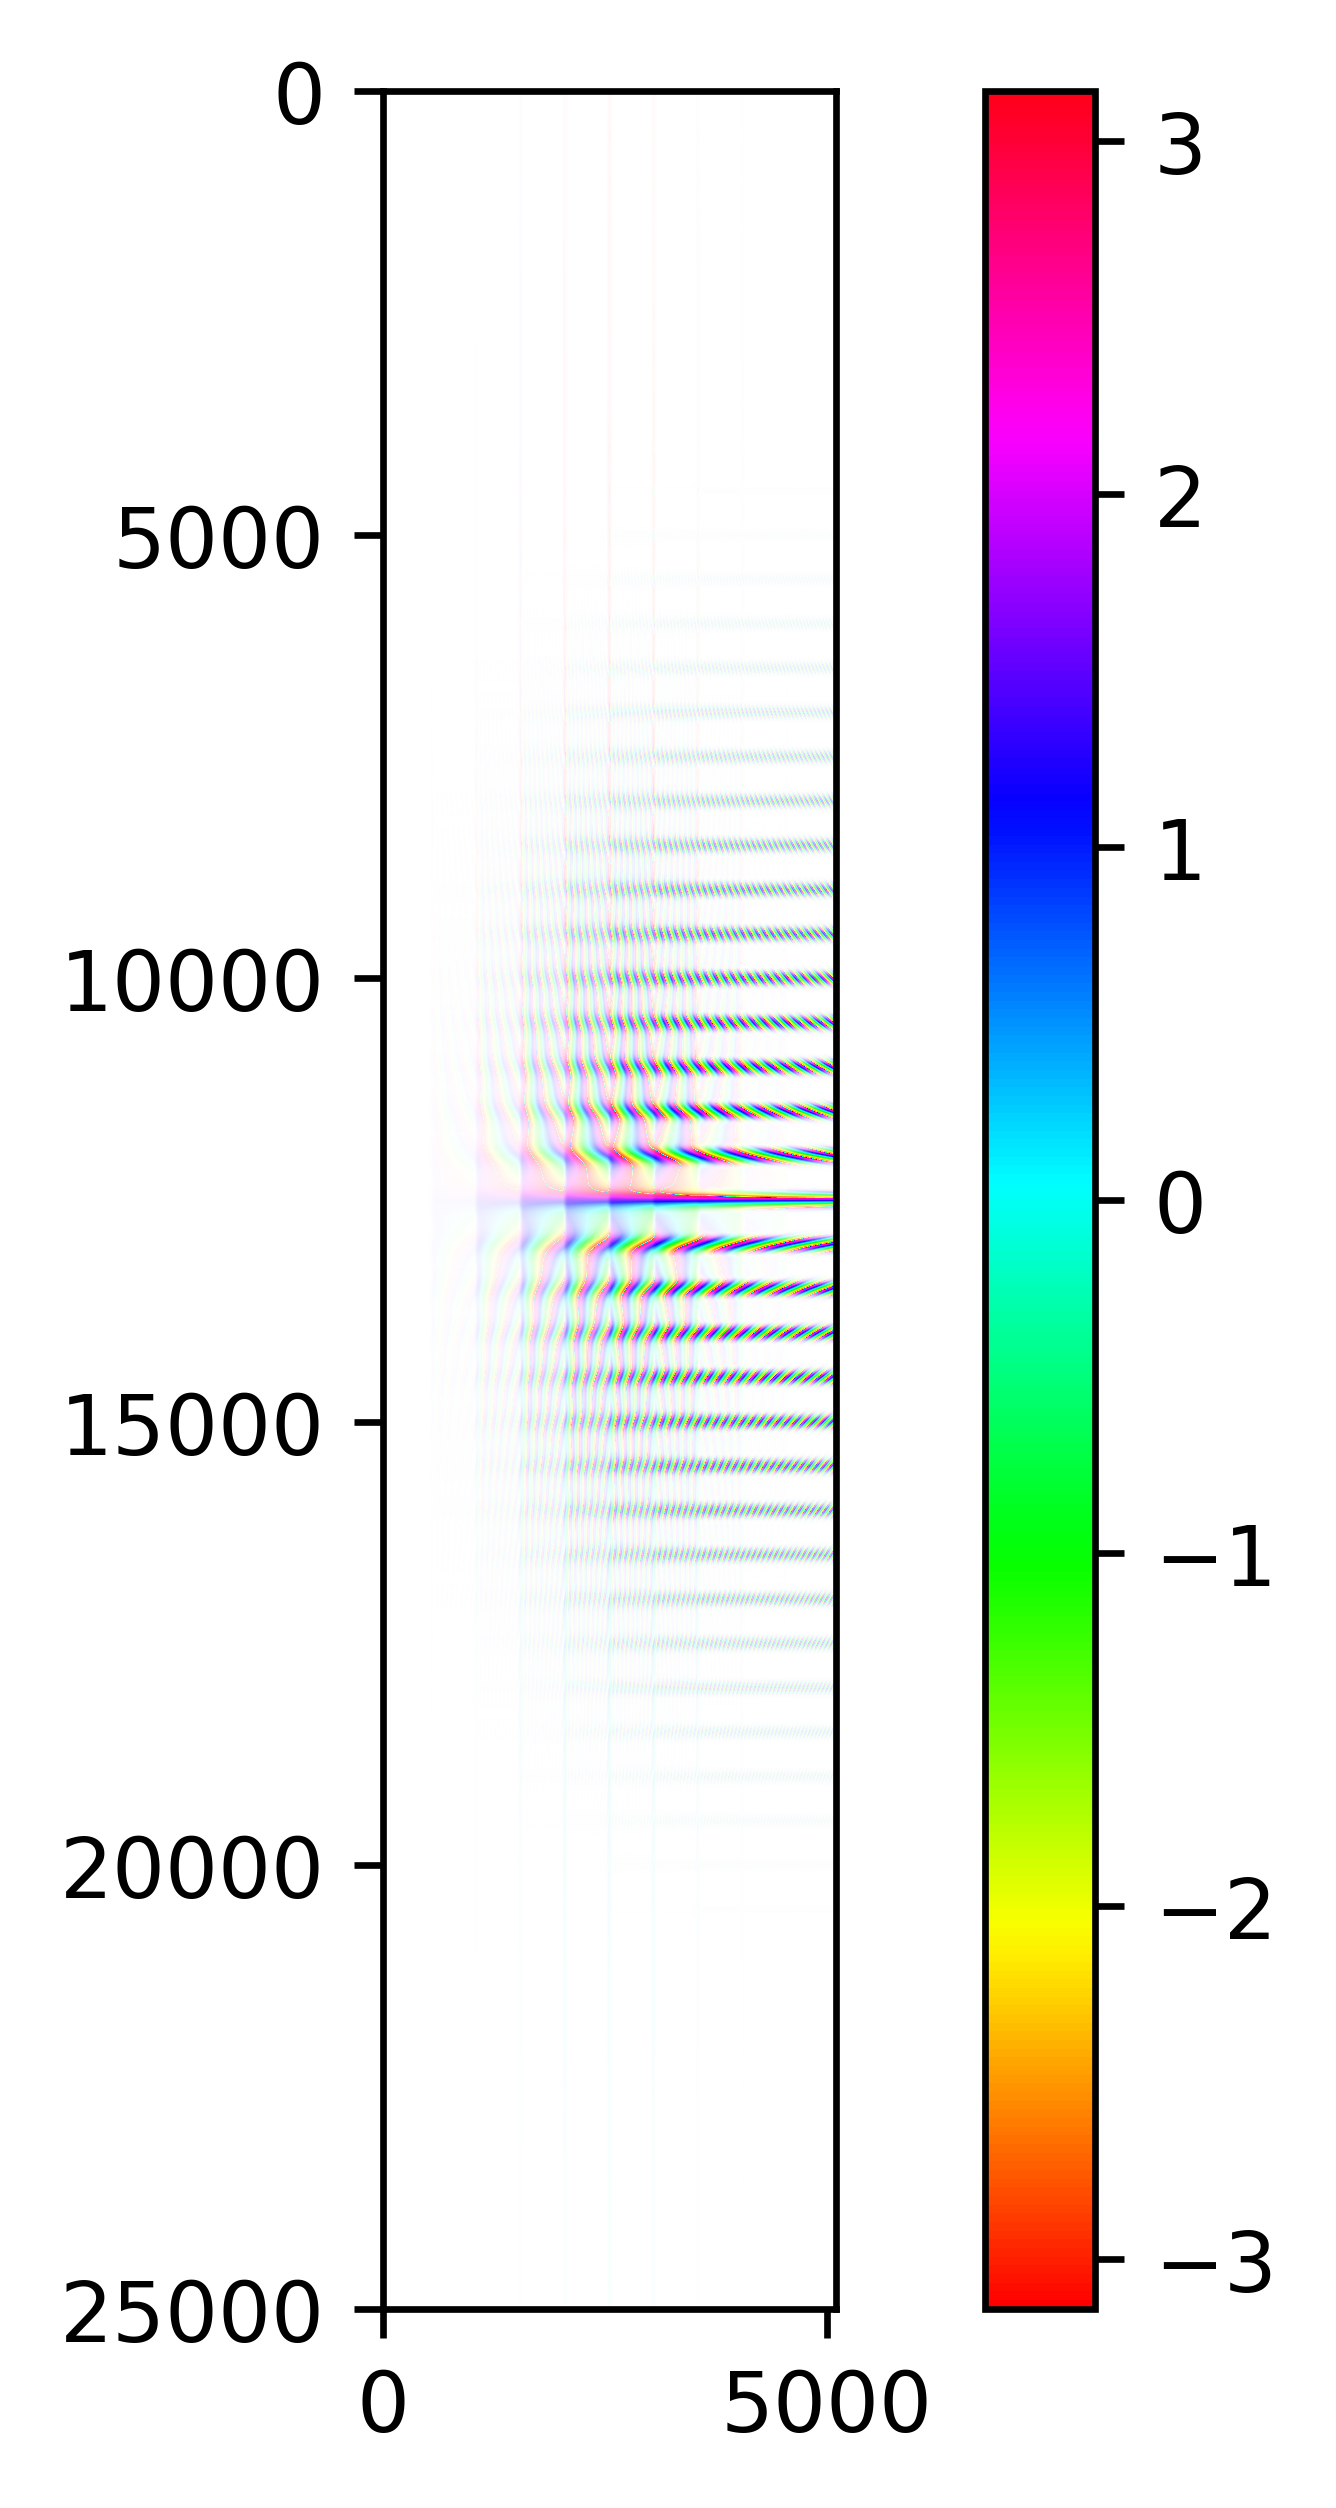

In [29]:
plt.figure()
plt.plot(offsetSweepEvolutionTraj[:,-1,2,0])
plt.show()

f_t_M_z = offsetSweepEvolutionTraj[:,:,2,0]

plt.figure(dpi=600)
plt.imshow(np.power(f_t_M_z, 2), vmin=-.0,vmax=1.0,cmap='hot_r')
plt.colorbar()
plt.show()

M_trans = offsetSweepEvolutionTraj[:,:,0,0] + offsetSweepEvolutionTraj[:,:,1,0] * 1j


plt.figure(dpi=600)
plt.imshow(np.angle(M_trans), vmin=-np.pi,vmax=np.pi,cmap='hsv', alpha=np.abs(M_trans))
plt.colorbar()